In [7]:
import matplotlib.pyplot as plt
from matplotlib import cm, gridspec
import numpy as np
import math
from PIL import Image
from mpl_toolkits.axes_grid1 import make_axes_locatable



In [8]:
# set your color array and name of figure here:
dial_colors = np.linspace(0, 1, 1000)  # using linspace here as an example
figname = 'myDial'

# specify which index you want your arrow to point to
arrow_index = 750

# create labels at desired locations
# note that the pie plot ploots from right to left
labels = [' '] * len(dial_colors) * 2
labels[25] = '100'
labels[250] = '75'
labels[500] = '50'
labels[750] = '25'
labels[975] = '0'




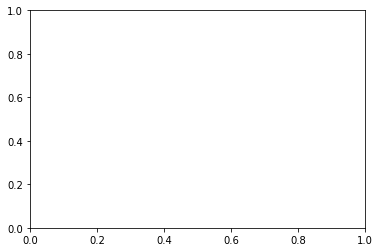

In [9]:
# function plotting a colored dial
def dial(color_array, arrow_index, labels, ax):
    # Create bins to plot (equally sized)
    size_of_groups = np.ones(len(color_array) * 2)

    # Create a pieplot, half white, half colored by your color array
    white_half = np.ones(len(color_array)) * .5
    color_half = color_array
    color_pallet = np.concatenate([color_half, white_half])

    cs = cm.RdYlBu(color_pallet)
    pie_wedge_collection = ax.pie(size_of_groups, colors=cs, labels=labels)

    i = 0
    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor(cm.RdYlBu(color_pallet[i]))
        i = i + 1

    # create a white circle to make the pie chart a dial
    my_circle = plt.Circle((0, 0), 0.3, color='white')
    ax.add_artist(my_circle)

    # create the arrow, pointing at specified index
    arrow_angle = (arrow_index / float(len(color_array))) * 3.14159
    arrow_x = 0.2 * math.cos(arrow_angle)
    arrow_y = 0.2 * math.sin(arrow_angle)
    ax.arrow(0, 0, -arrow_x, arrow_y, width=.02, head_width=.05, \
             head_length=.1, fc='k', ec='k')


# create figure and specify figure name
fig, ax = plt.subplots()



<Figure size 432x288 with 0 Axes>

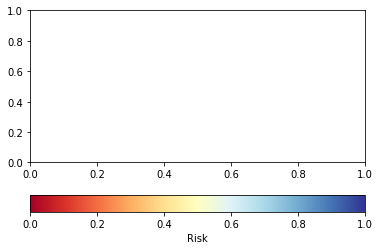

In [10]:
# make dial plot and save figure
dial(dial_colors, arrow_index, labels, ax)
ax.set_aspect('equal')
plt.savefig(figname + '.png', bbox_inches='tight')

# create a figure for the colorbar (crop so only colorbar is saved)
fig, ax2 = plt.subplots()
cmap = cm.ScalarMappable(cmap='RdYlBu')
cmap.set_array([min(dial_colors), max(dial_colors)])
cbar = plt.colorbar(cmap, orientation='horizontal')
cbar.ax.set_xlabel("Risk")
plt.savefig('cbar.png', bbox_inches='tight')
cbar = Image.open('cbar.png')
c_width, c_height = cbar.size
cbar = cbar.crop((0, .8 * c_height, c_width, c_height)).save('cbar.png')

# open figure and crop bottom half
im = Image.open(figname + '.png')
width, height = im.size

# crop bottom half of figure
# function takes top corner &lt;span                data-mce-type="bookmark"                id="mce_SELREST_start"              data-mce-style="overflow:hidden;line-height:0"              style="overflow:hidden;line-height:0"           &gt;&amp;#65279;&lt;/span&gt;and bottom corner coordinates
# of image to keep, (0,0) in python images is the top left corner
im = im.crop((0, 0, width + c_width, int(height / 2.0))).save(figname + '.png')